# Exploration notes for harmony project

In [1]:
from loader import MetaCorpraInfo, CorpusInfo, PieceInfo
import seaborn as sns
from matplotlib import pyplot as plt

## 0. Baiscs of the DCML corpora (annotated)


### 0.1 About the corpora

In [2]:
# very time-consuming to load...
metacorpora_path = 'dcml_corpora/'
metacorpora = MetaCorpraInfo(metacorpora_path)

#### 0.1.1. List of Corpora

In [3]:
import pandas as pd
annotated_corpus_list = metacorpora.annotated_corpus_list
print(pd.DataFrame(annotated_corpus_list))

                                 corpus_path
0                          dcml_corpora/ABC/
1            dcml_corpora/bach_en_fr_suites/
2                    dcml_corpora/bach_solo/
3      dcml_corpora/beethoven_piano_sonatas/
4            dcml_corpora/c_schumann_lieder/
5              dcml_corpora/chopin_mazurkas/
6                      dcml_corpora/corelli/
7            dcml_corpora/couperin_clavecin/
8            dcml_corpora/couperin_concerts/
9    dcml_corpora/debussy_suite_bergamasque/
10          dcml_corpora/dvorak_silhouettes/
11  dcml_corpora/frescobaldi_fiori_musicali/
12            dcml_corpora/gastoldi_baletti/
13        dcml_corpora/grieg_lyrical_pieces/
14             dcml_corpora/handel_keyboard/
15             dcml_corpora/jc_bach_sonatas/
16  dcml_corpora/kleine_geistliche_konzerte/
17             dcml_corpora/kozeluh_sonatas/
18            dcml_corpora/liszt_pelerinage/
19    dcml_corpora/mahler_kindertotenlieder/
20               dcml_corpora/medtner_tales/
21        

#### 0.1.2. Chronological distribution of pieces

In [16]:
composed_years = metacorpora.get_corpora_concat_metadata_df(selected_keys=['corpus', 'fnames', 'composed_end'])


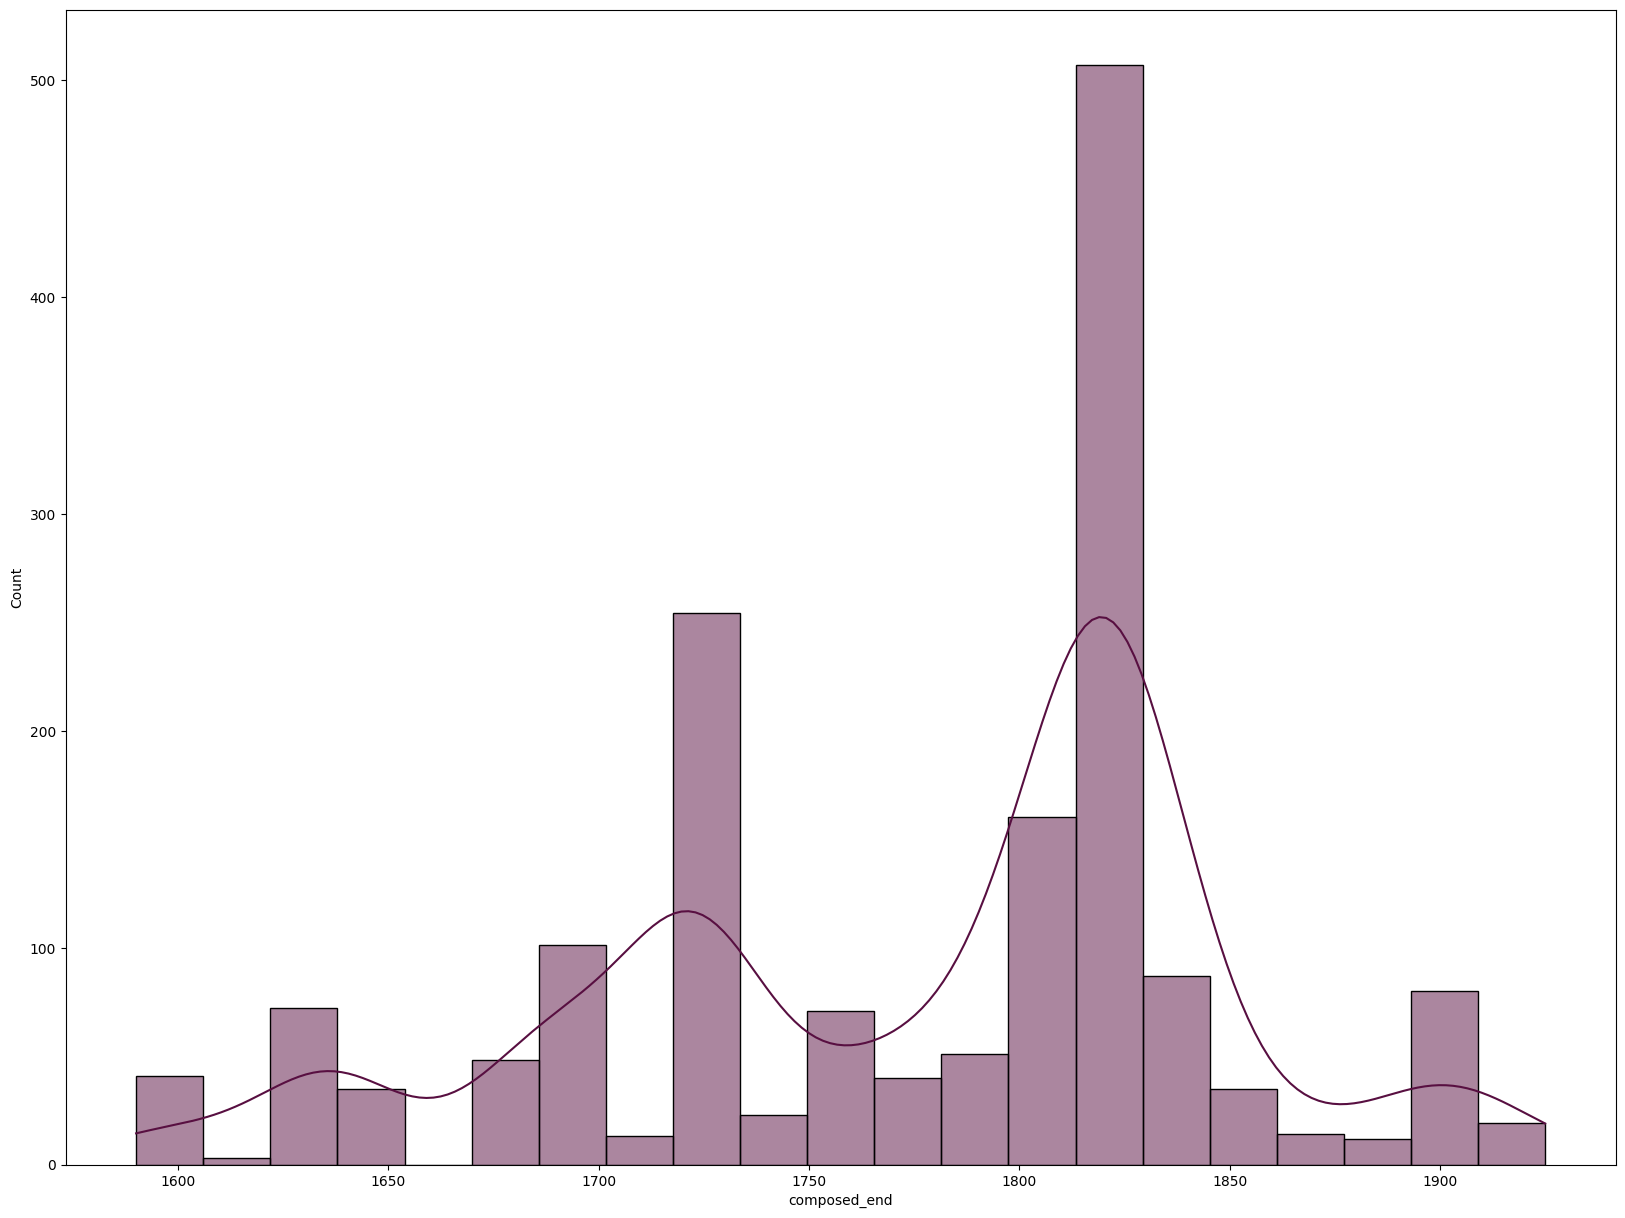

In [17]:

f, ax = plt.subplots(figsize=(20, 15))
# sns.histplot(data=composed_years, x='composed_end', stat='count', color='#4B0082', kde=True)
sns.histplot(data=composed_years, x='composed_end', stat='count', color='#580F41', kde=True)
plt.show()

/Users/xinyiguan/venv/music/lib/python3.10/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


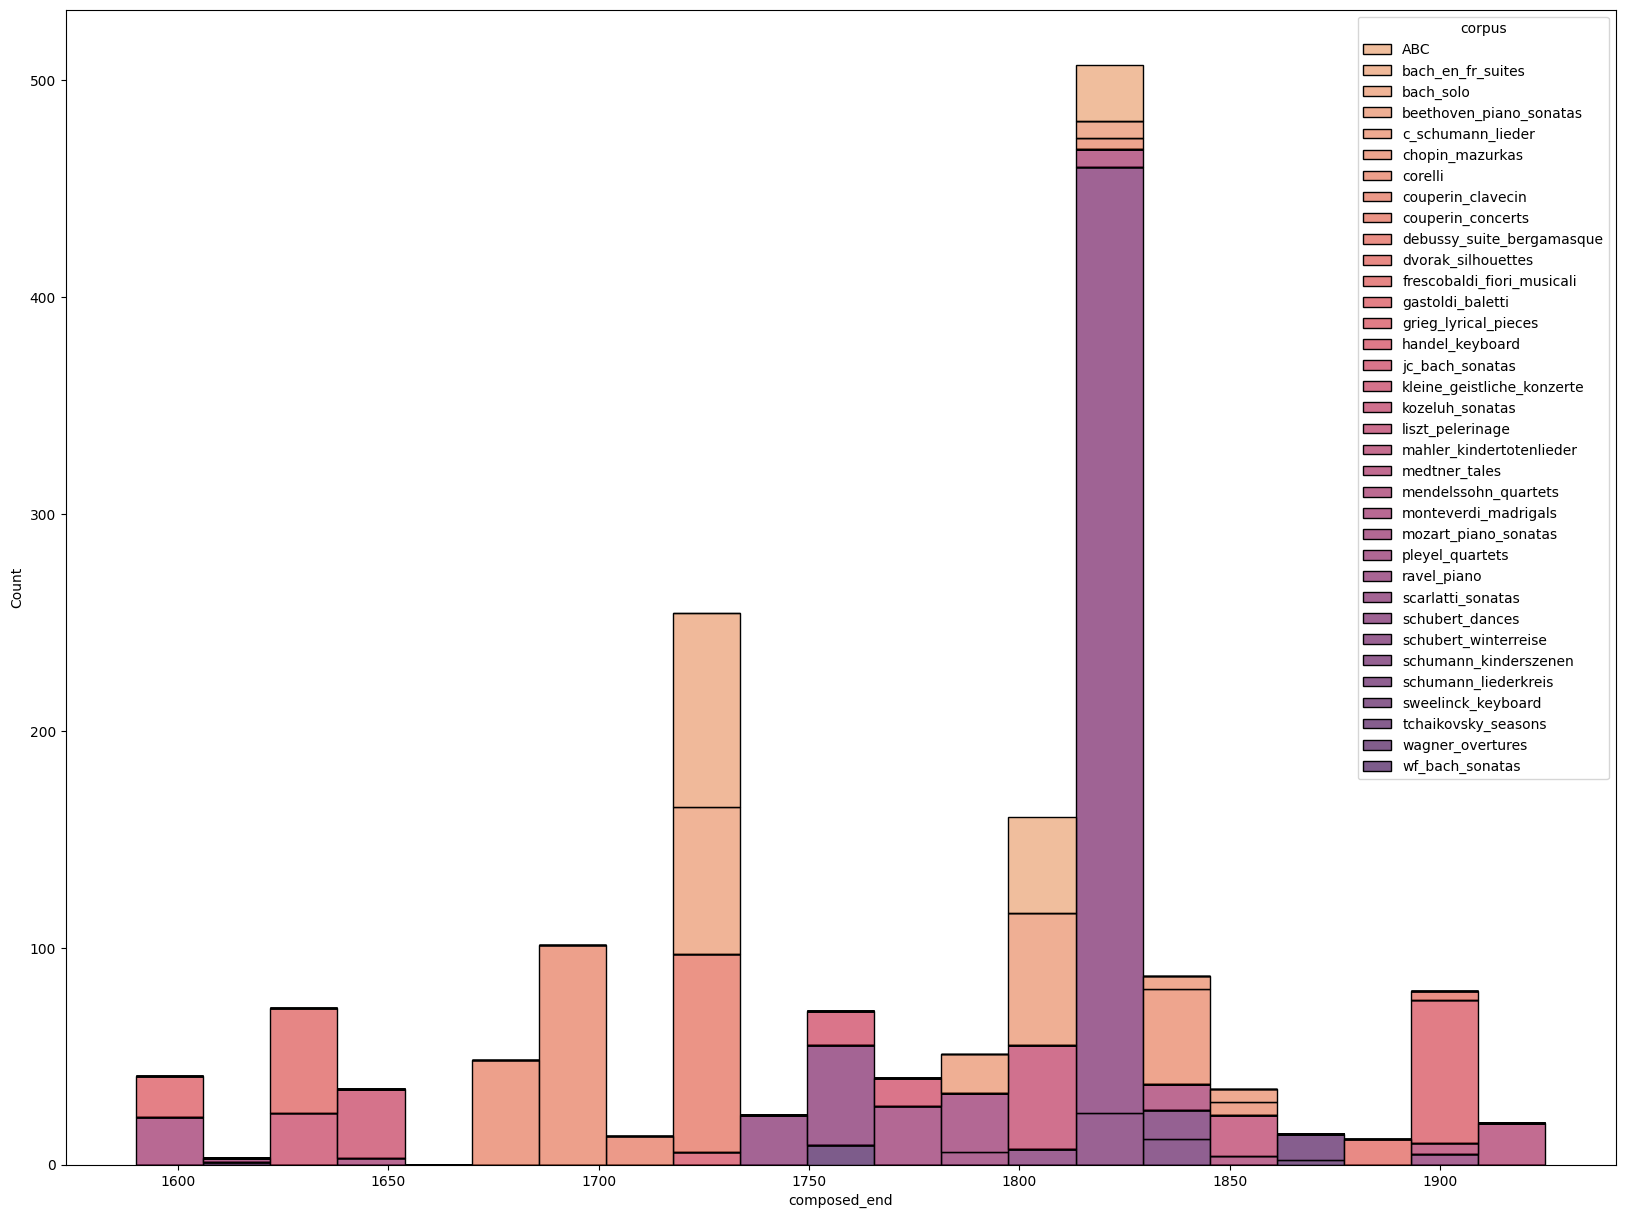

In [23]:
f, ax = plt.subplots(figsize=(20, 15))
sns.histplot(data=composed_years, x='composed_end', hue='corpus', stat='count', palette="flare", multiple="stack")
plt.show()


## 1. Regularity of chord vocabs (unigram)

All unique chord vocabularies across the metacorpora:

In [4]:
unique_chord_vocab = metacorpora.get_corpora_unique_key_values(aspect='harmonies', key='chord')

f"The number of unique chord vocab in the corpora is {len(unique_chord_vocab.shape[0])}"

FileNotFoundError: [Errno 2] No such file or directory: 'dcml_corpora/beethoven_piano_sonatas/harmonies/04-1.tsv'

1. Change of symmetry

- Concerns the romantic piano corpus
    - Take all the (numeral) bigrams from each piece in the corpora.

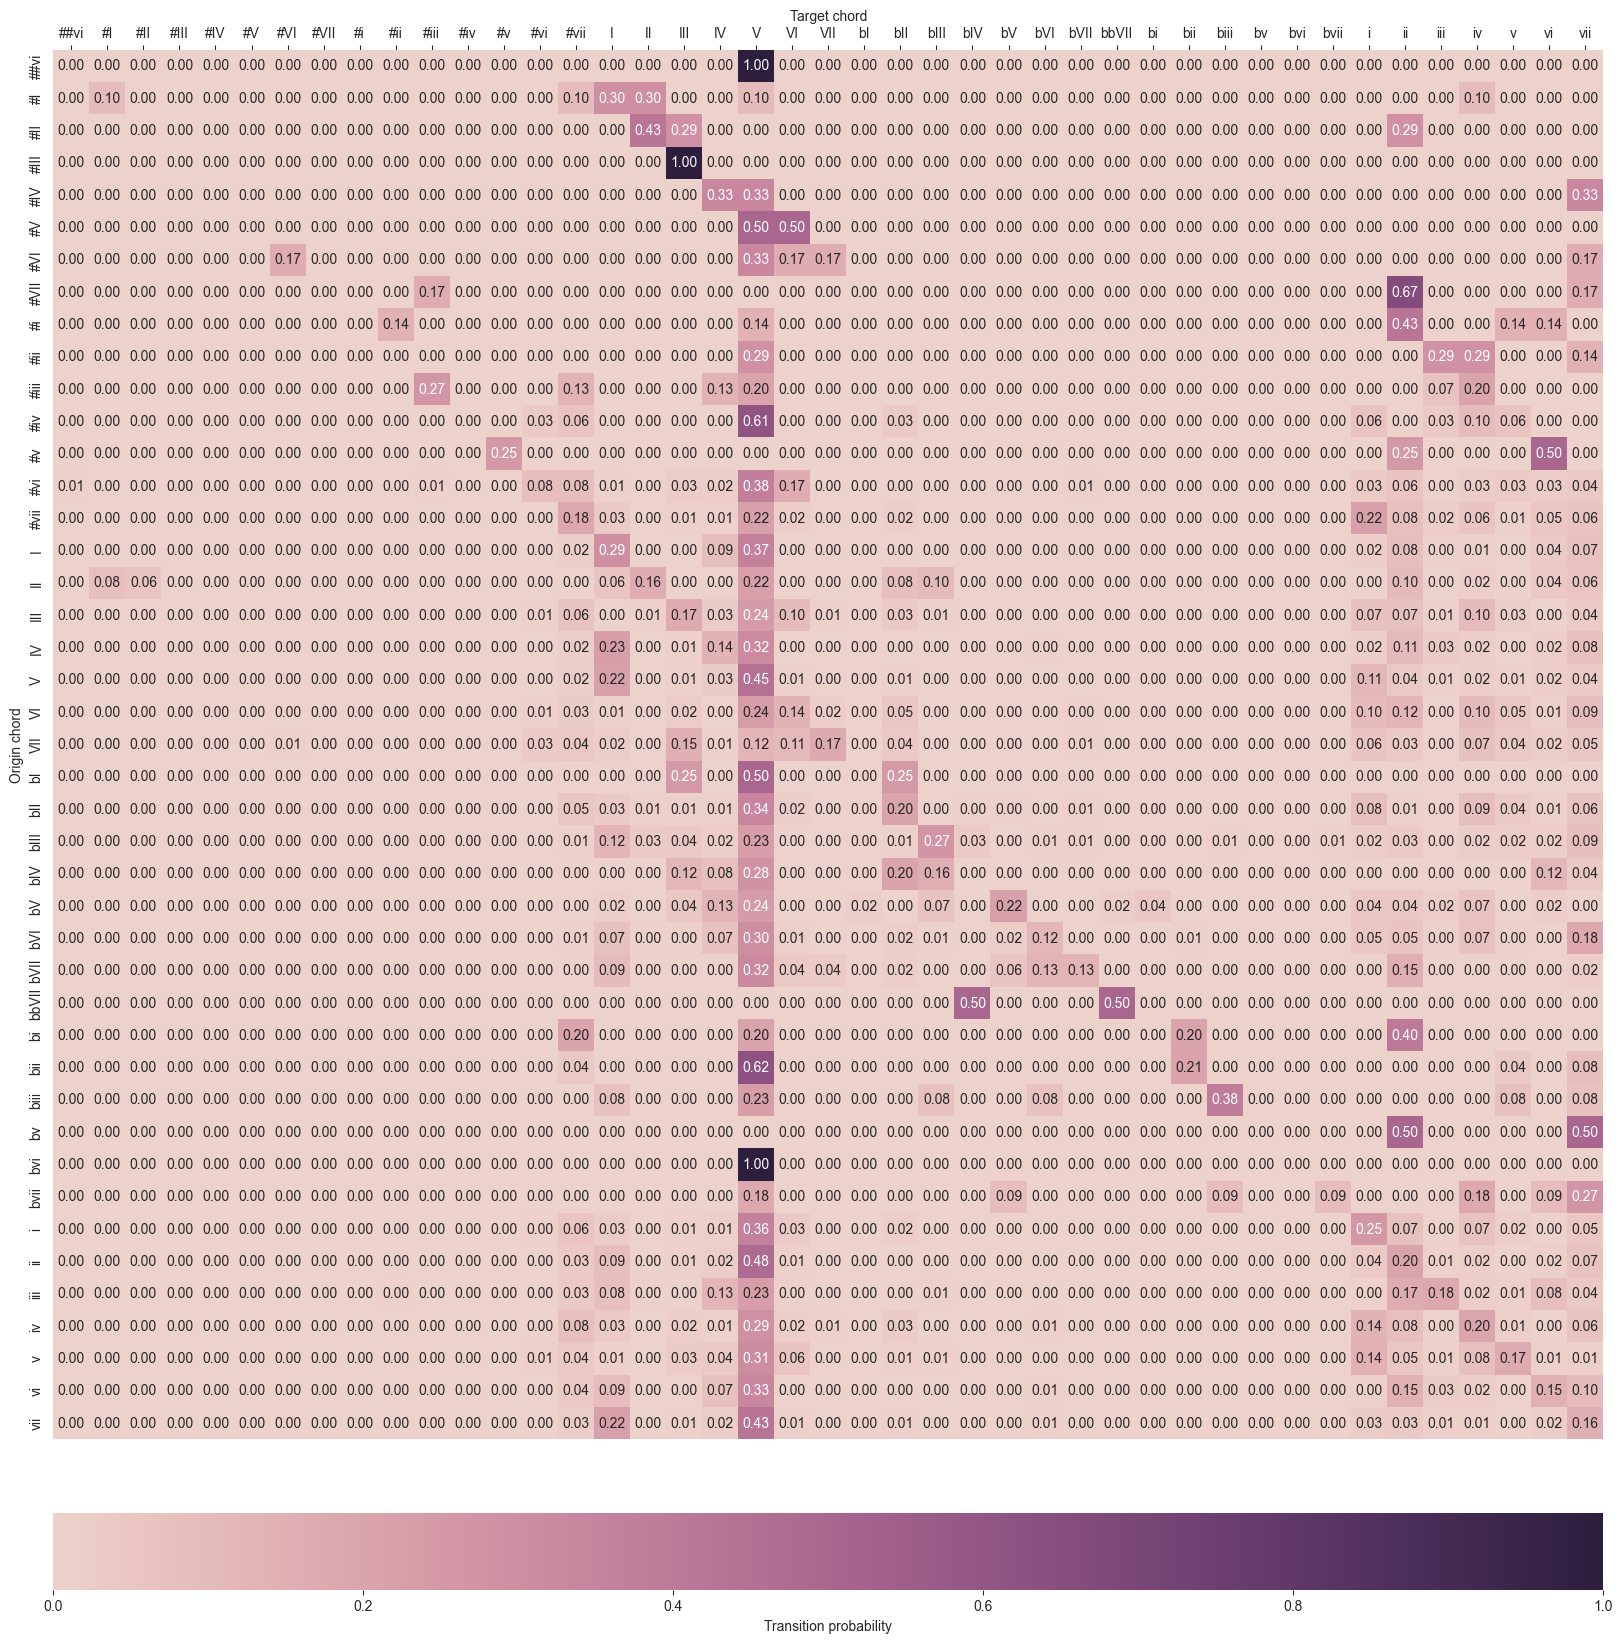

In [2]:

metacorpora_path = 'romantic_piano_corpus/'
metacorpora = MetaCorpraInfo(metacorpora_path)

tran_prob = metacorpora.get_transition_matrix(n=2, aspect='harmonies', key='numeral', probability=True)


grid_kws = {"height_ratios": (.9, .05), "hspace": .1}
f, (ax, cbar_ax) = plt.subplots(2, figsize=(20, 20), gridspec_kw=grid_kws)

sns.heatmap(tran_prob, ax=ax, square=False, vmin=0, vmax=1, cbar=True,
            cbar_ax=cbar_ax, cmap=sns.cubehelix_palette(as_cmap=True), annot=True, fmt='.2f',
            cbar_kws={"orientation": "horizontal", "fraction": 0.1,
                      "label": "Transition probability"})

ax.set_xlabel("Target chord")
ax.xaxis.tick_top()
ax.set_ylabel("Origin chord")
ax.xaxis.set_label_position('top')
plt.show()